In [2]:
import pandas as pd 
df_pca = pd.read_csv("merge_new_device.csv", index_col=None)
#df_angle.reset_index(drop=True)
df_pca.head()

Unnamed: 0                    t  hr  bpl  bph  steps  Unnamed: 0.1  \
0           0  2019-12-18 18:16:20  67   85  127   54.0             0   
1           1  2019-12-18 18:19:20  66   85  127   54.0             1   
2           2  2019-12-18 18:20:20  70   86  129   54.0             2   
3           3  2019-12-18 18:18:20  70   70  105   54.0             3   
4           4  2019-12-18 18:17:20  67   78  117   54.0             4   

   Unnamed: 0.1.1                       _id     alt  ...  angle  PM2_5   PM10  \
0               0  5cac6efd6ebf70d310b8f475  679.26  ...   DOWN  5.667  6.167   
1               1  5cac6efe6ebf70d3364d6b5f  679.28  ...   DOWN  5.667  8.167   
2               2  5cac6eff6ebf70d361c2f570  679.43  ...   DOWN  5.500  5.500   
3               3  5cac6f006ebf70d384547bd6  679.69  ...   DOWN  7.167  8.000   
4               4  5cac6f016ebf70d3afb09f05  679.39  ...   DOWN  5.500  7.000   

    Tvoc   CO2 Temperature Humidity   Noise  CH2O C6H6  
0  0.383  0.04        19.5   39.486  80.123  0.01  0.0  
1  0.428  0.04        19.5   39.417  81.147  0.01  0.0  
2  0.398  0.04        19.6   39.117  82.337  0.01  0.0  
3  0.398  0.04        19.6   37.243  82.340  0.01  0.0  
4  0.417  0.04        19.6   39.067  74.153  0.01  0.0  

[5 rows x 29 columns]

In [3]:
def remove_outlier(v):
    y = df_pca[v]
    removed_outliers = y.between(y.quantile(.01), y.quantile(.99))
    index_names = df_pca[~removed_outliers].index
    df_pca.drop(index_names, inplace=True)

remove_outlier('PM2_5')
remove_outlier('PM10')
remove_outlier('Tvoc')
remove_outlier('Temperature')
remove_outlier('Humidity')
remove_outlier('Noise')
remove_outlier('CH2O')
#remove_outlier('C6H6')
remove_outlier('hr')
remove_outlier('bpl')
remove_outlier('bph')

In [4]:
df_pca['diff_bph-bpl'] = df_pca['bph'] - df_pca['bpl'] 

In [5]:
df_pca = df_pca[['PM2_5','PM10', 'Tvoc', 'CO2', 'CH2O',
                             'Noise', 'Temperature', 'Humidity', 'hr', 
                     'bph', 'angle', 'diff_bph-bpl' , 'steps']]
df_pca
df_pca.reset_index(drop=True)

PM2_5    PM10   Tvoc    CO2  CH2O   Noise  Temperature  Humidity  hr  \
0      7.167   8.000  0.398  0.040  0.01  82.340       19.600    37.243  70   
1      5.500   6.500  0.377  0.040  0.01  77.308       19.600    37.214  66   
2      5.333   6.833  0.062  0.040  0.01  87.973       19.929    38.143  66   
3      6.000   6.167  0.042  0.040  0.01  90.193       19.967    38.067  66   
4      6.000   6.333  0.053  0.040  0.01  79.443       19.983    38.000  66   
...      ...     ...    ...    ...   ...     ...          ...       ...  ..   
2027  11.000  11.857  0.043  0.041  0.00  86.440       17.100    31.600  67   
2028  11.400  12.800  0.032  0.041  0.00  86.180       17.100    31.571  67   
2029  12.857  14.429  0.036  0.041  0.00  93.863       17.100    31.617  67   
2030  11.000  12.600  0.040  0.041  0.00  80.637       17.100    31.650  67   
2031  11.200  12.600  0.035  0.041  0.00  97.703       17.100    31.683  67   

      bph angle  diff_bph-bpl   steps  
0     105  DOWN            35    54.0  
1     109  DOWN            36    54.0  
2     120  DOWN            40   393.0  
3     112  DOWN            37   393.0  
4     138  DOWN            46   393.0  
...   ...   ...           ...     ...  
2027  120  DOWN            40  2244.0  
2028  130  DOWN            43  2244.0  
2029  126  DOWN            42  2244.0  
2030  117  DOWN            39  2244.0  
2031  129  DOWN            43  2264.0  

[2032 rows x 13 columns]

In [6]:
from sklearn.preprocessing import StandardScaler
# Separating out the features
x = df_pca.loc[:, ['PM2_5', 'PM10','Tvoc','CO2', 'CH2O','Noise','Temperature','Humidity','hr','bph','diff_bph-bpl','steps']].values
# Standardizing the features
data_scaled = StandardScaler().fit_transform(x)
data_scaled

array([[-0.41770651, -0.40551081,  0.17410535, ..., -0.44243552,
        -0.44532197, -0.92630038],
       [-0.64034601, -0.59101021,  0.13084135, ..., -0.30643023,
        -0.34354554, -0.92630038],
       [-0.66265003, -0.54982935, -0.51811862, ...,  0.06758432,
         0.06356018, -0.85050708],
       ...,
       [ 0.34223275,  0.38953961, -0.57168357, ...,  0.27159226,
         0.26711304, -0.43666223],
       [ 0.09421742,  0.16335401, -0.56344281, ..., -0.03441965,
        -0.03821625, -0.43666223],
       [ 0.12092882,  0.16335401, -0.57374376, ...,  0.37359623,
         0.36888947, -0.43219065]])

PCA

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal_component_1', 'principal_component_2'])

In [8]:
principalDf.head()

principal_component_1  principal_component_2
0              -0.466484               0.734831
1              -0.749877               0.425440
2              -0.949869              -0.037024
3              -0.872847               0.317332
4              -1.124025              -0.809872

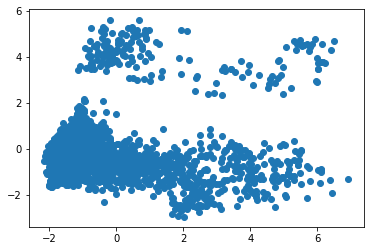

In [9]:
import matplotlib.pyplot as plt 
plt.scatter(principalDf['principal_component_1'], principalDf['principal_component_2'])
plt.show()

In [10]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.31003398 0.18623678]


In [11]:
print ('Eigenvalues {}'.format (pca.explained_variance_))

Eigenvalues [3.72223962 2.23594177]


In [12]:
print ('Eigenevectors {}'.format (pca.components_))

Eigenevectors [[ 0.47874005  0.47579084  0.07717266  0.39320989  0.3345677   0.05107293
  -0.3806122  -0.26996001  0.06602234 -0.11652748 -0.11713998  0.14111687]
 [-0.07459504 -0.07353802  0.11623894 -0.17063642 -0.00130767  0.02890642
   0.14170048  0.06874047  0.33721333 -0.60978929 -0.6097684   0.25176296]]


In [13]:
import numpy as np
cov = np.cov(data_scaled.T)
eig_val, eig_vec = np.linalg.eig(cov)
print('Eigenvalues = ', eig_val)
print('Eigenvectors = ', eig_vec)

Eigenvalues =  [3.72223962e+00 2.23594177e+00 1.58877632e+00 1.18664779e+00
 9.59887593e-01 7.64335186e-01 6.45568576e-01 4.70535895e-01
 2.50578341e-01 1.75562050e-01 4.66224680e-03 1.17302595e-03]
Eigenvectors =  [[ 4.78740054e-01  7.45950373e-02 -6.16318222e-02  1.88932072e-01
  -8.49307600e-02 -1.21313196e-02 -3.81702507e-02  3.43535683e-01
   2.70172314e-01 -1.16001786e-01 -7.15867296e-01  3.40131117e-04]
 [ 4.75790843e-01  7.35380205e-02 -6.22144580e-02  1.93843372e-01
  -9.06143286e-02 -1.06980069e-02 -4.40937391e-02  3.52756386e-01
   2.95855957e-01 -1.31861821e-01  6.97957217e-01 -2.19448015e-04]
 [ 7.71726623e-02 -1.16238938e-01  6.43042764e-01  2.05269535e-01
   1.76960912e-01  1.53050089e-01 -3.59046343e-01  3.35490439e-01
  -4.74056562e-01  6.26245933e-02  5.80390156e-03 -7.46260157e-04]
 [ 3.93209891e-01  1.70636416e-01  2.65537340e-01 -2.97736370e-01
  -2.19126751e-02 -1.43924831e-01  1.09724235e-01 -1.68432290e-01
   9.77350221e-02  7.65405556e-01  1.05179919e-02 -6.134

Autoencoder Keras  non-linear transformations

In [24]:
from keras.models import Model
from keras.layers import Input,Conv1D,MaxPooling1D,UpSampling1D,Dense, Flatten
from keras import regularizers
input_dim = data_scaled.shape[1]
input_dim

12

Conv 1D 

In [29]:
# ENCODER
input_sig = Input(batch_shape=(None,input_dim,1))
x = Conv1D(9,3, activation='relu', padding='valid')(input_sig)
x1 = MaxPooling1D(2)(x)
x2 = Conv1D(6,3, activation='relu', padding='valid')(x1)
x3 = MaxPooling1D(2)(x2)
flat = Flatten()(x3)
encoded = Dense(2,activation = 'relu')(flat)


# DECODER 
x2_ = Conv1D(6, 3, activation='relu', padding='valid')(x3)
x1_ = UpSampling1D(2)(x2_)
x_ = Conv1D(9, 3, activation='relu', padding='valid')(x1_)
upsamp = UpSampling1D(2)(x_)
flat = Flatten()(upsamp)
decoded = Dense(input_dim,activation = 'sigmoid')(flat)
#decoded = Reshape((input_dim,1))(decoded)

autoencoder = Model(input_sig, decoded)
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

autoencoder_train = autoencoder.fit(data_scaled, data_scaled,
                epochs=750,
                batch_size=256,
                shuffle=True)

ValueError: Negative dimension size caused by subtracting 3 from 1 for 'conv1d_14/convolution' (op: 'Conv2D') with input shapes: [?,1,1,6], [1,3,6,6].

Autoencoder 

In [15]:
encoding_dim = 2
input_layer = Input(shape=(input_dim, ))
encoded = Dense(12, activation="relu", activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(7, activation="relu")(encoded)
encoded = Dense(4, activation="relu")(encoded)
encoded = Dense(encoding_dim, activation="relu")(encoded)

decoded = Dense(4, activation='relu')(encoded)
decoded = Dense(7, activation='relu')(decoded)
decoded = Dense(12, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

In [16]:
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='Adam', loss='mse')
autoencoder_train = autoencoder.fit(data_scaled, data_scaled,
                epochs=750,
                batch_size=256,
                shuffle=True)

Epoch 1/750
2032/2032 [==============================] - 0s 126us/step - loss: 1.3646
Epoch 2/750
2032/2032 [==============================] - 0s 15us/step - loss: 1.3559
Epoch 3/750
2032/2032 [==============================] - 0s 13us/step - loss: 1.3462
Epoch 4/750
2032/2032 [==============================] - 0s 18us/step - loss: 1.3355
Epoch 5/750
2032/2032 [==============================] - 0s 19us/step - loss: 1.3228
Epoch 6/750
2032/2032 [==============================] - 0s 17us/step - loss: 1.3075
Epoch 7/750
2032/2032 [==============================] - 0s 16us/step - loss: 1.2888
Epoch 8/750
2032/2032 [==============================] - 0s 23us/step - loss: 1.2660
Epoch 9/750
2032/2032 [==============================] - 0s 16us/step - loss: 1.2391
Epoch 10/750
2032/2032 [==============================] - 0s 16us/step - loss: 1.2086
Epoch 11/750
2032/2032 [==============================] - 0s 17us/step - loss: 1.1767
Epoch 12/750
2032/2032 [==============================] - 0s 1

2032/2032 [==============================] - 0s 13us/step - loss: 0.8592
Epoch 97/750
2032/2032 [==============================] - 0s 14us/step - loss: 0.8580
Epoch 98/750
2032/2032 [==============================] - 0s 12us/step - loss: 0.8569
Epoch 99/750
2032/2032 [==============================] - 0s 14us/step - loss: 0.8559
Epoch 100/750
2032/2032 [==============================] - 0s 14us/step - loss: 0.8550
Epoch 101/750
2032/2032 [==============================] - 0s 14us/step - loss: 0.8540
Epoch 102/750
2032/2032 [==============================] - 0s 15us/step - loss: 0.8532
Epoch 103/750
2032/2032 [==============================] - 0s 12us/step - loss: 0.8525
Epoch 104/750
2032/2032 [==============================] - 0s 14us/step - loss: 0.8517
Epoch 105/750
2032/2032 [==============================] - 0s 13us/step - loss: 0.8509
Epoch 106/750
2032/2032 [==============================] - 0s 12us/step - loss: 0.8504
Epoch 107/750
2032/2032 [==============================] - 0

Epoch 190/750
2032/2032 [==============================] - 0s 11us/step - loss: 0.8337
Epoch 191/750
2032/2032 [==============================] - 0s 11us/step - loss: 0.8335
Epoch 192/750
2032/2032 [==============================] - 0s 18us/step - loss: 0.8335
Epoch 193/750
2032/2032 [==============================] - 0s 22us/step - loss: 0.8336
Epoch 194/750
2032/2032 [==============================] - 0s 20us/step - loss: 0.8335
Epoch 195/750
2032/2032 [==============================] - 0s 13us/step - loss: 0.8334
Epoch 196/750
2032/2032 [==============================] - 0s 13us/step - loss: 0.8334
Epoch 197/750
2032/2032 [==============================] - 0s 15us/step - loss: 0.8334
Epoch 198/750
2032/2032 [==============================] - 0s 10us/step - loss: 0.8333
Epoch 199/750
2032/2032 [==============================] - 0s 14us/step - loss: 0.8334
Epoch 200/750
2032/2032 [==============================] - 0s 16us/step - loss: 0.8333
Epoch 201/750
2032/2032 [==================

2032/2032 [==============================] - 0s 14us/step - loss: 0.8294
Epoch 285/750
2032/2032 [==============================] - 0s 14us/step - loss: 0.8296
Epoch 286/750
2032/2032 [==============================] - 0s 14us/step - loss: 0.8296
Epoch 287/750
2032/2032 [==============================] - 0s 14us/step - loss: 0.8294
Epoch 288/750
2032/2032 [==============================] - 0s 12us/step - loss: 0.8293
Epoch 289/750
2032/2032 [==============================] - 0s 13us/step - loss: 0.8292
Epoch 290/750
2032/2032 [==============================] - 0s 17us/step - loss: 0.8291
Epoch 291/750
2032/2032 [==============================] - 0s 12us/step - loss: 0.8292
Epoch 292/750
2032/2032 [==============================] - 0s 14us/step - loss: 0.8293
Epoch 293/750
2032/2032 [==============================] - 0s 17us/step - loss: 0.8294
Epoch 294/750
2032/2032 [==============================] - 0s 12us/step - loss: 0.8290
Epoch 295/750
2032/2032 [==============================] 

2032/2032 [==============================] - 0s 13us/step - loss: 0.8194
Epoch 379/750
2032/2032 [==============================] - 0s 14us/step - loss: 0.8190
Epoch 380/750
2032/2032 [==============================] - 0s 14us/step - loss: 0.8188
Epoch 381/750
2032/2032 [==============================] - 0s 16us/step - loss: 0.8189
Epoch 382/750
2032/2032 [==============================] - 0s 14us/step - loss: 0.8193
Epoch 383/750
2032/2032 [==============================] - 0s 14us/step - loss: 0.8188
Epoch 384/750
2032/2032 [==============================] - 0s 13us/step - loss: 0.8184
Epoch 385/750
2032/2032 [==============================] - 0s 16us/step - loss: 0.8178
Epoch 386/750
2032/2032 [==============================] - 0s 9us/step - loss: 0.8177
Epoch 387/750
2032/2032 [==============================] - 0s 12us/step - loss: 0.8176
Epoch 388/750
2032/2032 [==============================] - 0s 14us/step - loss: 0.8176
Epoch 389/750
2032/2032 [==============================] -

2032/2032 [==============================] - 0s 16us/step - loss: 0.8124
Epoch 473/750
2032/2032 [==============================] - 0s 14us/step - loss: 0.8127
Epoch 474/750
2032/2032 [==============================] - 0s 16us/step - loss: 0.8124
Epoch 475/750
2032/2032 [==============================] - 0s 17us/step - loss: 0.8125
Epoch 476/750
2032/2032 [==============================] - 0s 14us/step - loss: 0.8121
Epoch 477/750
2032/2032 [==============================] - 0s 14us/step - loss: 0.8121
Epoch 478/750
2032/2032 [==============================] - 0s 14us/step - loss: 0.8120
Epoch 479/750
2032/2032 [==============================] - 0s 15us/step - loss: 0.8118
Epoch 480/750
2032/2032 [==============================] - 0s 16us/step - loss: 0.8116
Epoch 481/750
2032/2032 [==============================] - 0s 16us/step - loss: 0.8118
Epoch 482/750
2032/2032 [==============================] - 0s 20us/step - loss: 0.8119
Epoch 483/750
2032/2032 [==============================] 

2032/2032 [==============================] - 0s 15us/step - loss: 0.8096
Epoch 567/750
2032/2032 [==============================] - 0s 15us/step - loss: 0.8095
Epoch 568/750
2032/2032 [==============================] - 0s 13us/step - loss: 0.8097
Epoch 569/750
2032/2032 [==============================] - 0s 11us/step - loss: 0.8097
Epoch 570/750
2032/2032 [==============================] - 0s 13us/step - loss: 0.8095
Epoch 571/750
2032/2032 [==============================] - 0s 14us/step - loss: 0.8102
Epoch 572/750
2032/2032 [==============================] - 0s 17us/step - loss: 0.8105
Epoch 573/750
2032/2032 [==============================] - 0s 9us/step - loss: 0.8103
Epoch 574/750
2032/2032 [==============================] - 0s 14us/step - loss: 0.8103
Epoch 575/750
2032/2032 [==============================] - 0s 18us/step - loss: 0.8116
Epoch 576/750
2032/2032 [==============================] - 0s 12us/step - loss: 0.8132
Epoch 577/750
2032/2032 [==============================] -

2032/2032 [==============================] - 0s 16us/step - loss: 0.8091
Epoch 661/750
2032/2032 [==============================] - 0s 15us/step - loss: 0.8089
Epoch 662/750
2032/2032 [==============================] - 0s 15us/step - loss: 0.8087
Epoch 663/750
2032/2032 [==============================] - 0s 23us/step - loss: 0.8084
Epoch 664/750
2032/2032 [==============================] - 0s 16us/step - loss: 0.8088
Epoch 665/750
2032/2032 [==============================] - 0s 17us/step - loss: 0.8086
Epoch 666/750
2032/2032 [==============================] - 0s 15us/step - loss: 0.8084
Epoch 667/750
2032/2032 [==============================] - 0s 17us/step - loss: 0.8090
Epoch 668/750
2032/2032 [==============================] - 0s 18us/step - loss: 0.8094
Epoch 669/750
2032/2032 [==============================] - 0s 18us/step - loss: 0.8098
Epoch 670/750
2032/2032 [==============================] - 0s 18us/step - loss: 0.8098
Epoch 671/750
2032/2032 [==============================] 

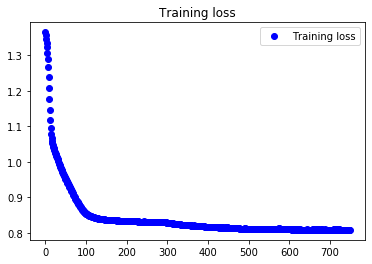

In [18]:
epochs = 750
loss = autoencoder_train.history['loss']
epochs = range(epochs)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [ ]:
# Crear encoder model
encoder = Model(inputs=input_layer, outputs=encoded)
# Use the model to predict the factors which sum up the information of interest rates.
encoded_data = pd.DataFrame(encoder.predict(data_scaled))
encoded_data.columns = ['factor_1', 'factor_2']

In [ ]:
import matplotlib.pyplot as plt 
plt.scatter(encoded_data['factor_1'], encoded_data['factor_2'])
plt.show()